In [93]:
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic' 
df = pd.read_csv('Student Attitude and Behavior.csv')

In [4]:
## Q: 학생이 공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 차이가 있을까??

In [5]:
df['prefer to study in'].unique()

array(['Morning', 'Anytime', 'Night'], dtype=object)

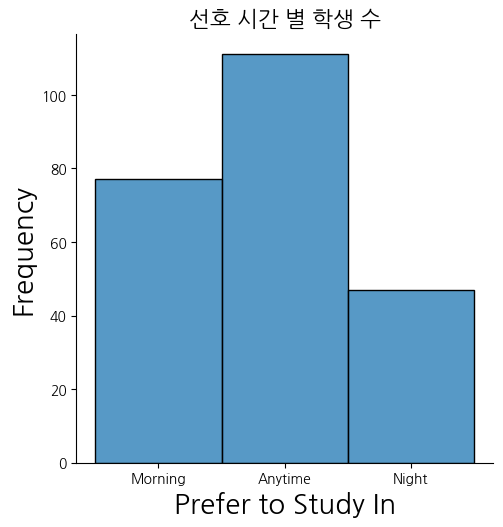

In [79]:
import seaborn as sns

sns.displot(df['prefer to study in'])

# 폰트 크기 설정
plt.xlabel('Prefer to Study In', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('선호 시간 별 학생 수', fontsize=16)

# 그래프 보여주기
plt.show()

In [ ]:
## normality check

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


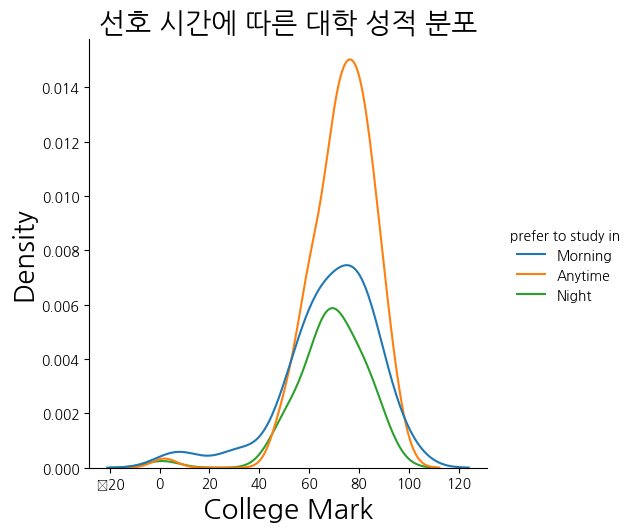

In [77]:
sns.displot(data = df, x = 'college mark', hue = 'prefer to study in', kind = 'kde')

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('선호 시간에 따른 대학 성적 분포', fontsize=20)

# 그래프 보여주기
plt.show()

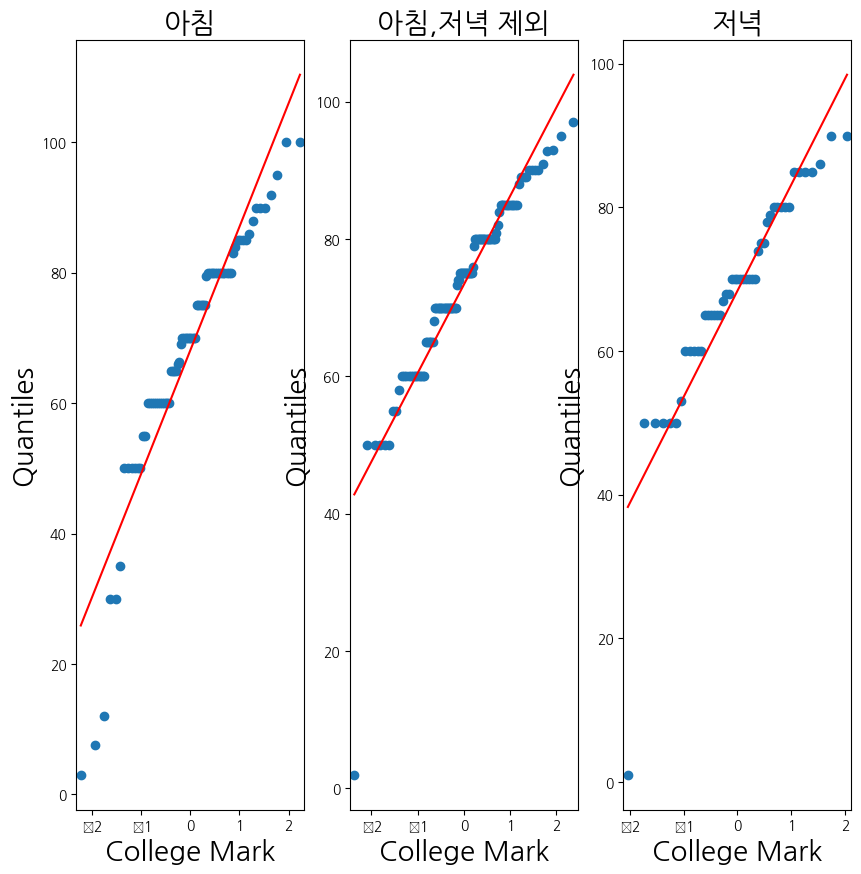

In [85]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (10,10))

# Morning
sm.qqplot(df[df['prefer to study in'] == 'Morning']['college mark'], ax = axes[0],line = 's')
axes[0].set_title('아침', fontsize=20)
axes[0].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[0].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# Anytime
sm.qqplot(df[df['prefer to study in'] == 'Anytime']['college mark'], ax = axes[1],line = 's')
axes[1].set_title('아침,저녁 제외', fontsize=20)
axes[1].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[1].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# Night
sm.qqplot(df[df['prefer to study in'] == 'Night']['college mark'], ax = axes[2],line = 's')
axes[2].set_title('저녁', fontsize=20)
axes[2].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[2].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

plt.show()

In [86]:
# 따로 나눠서 plot

<Figure size 600x600 with 0 Axes>

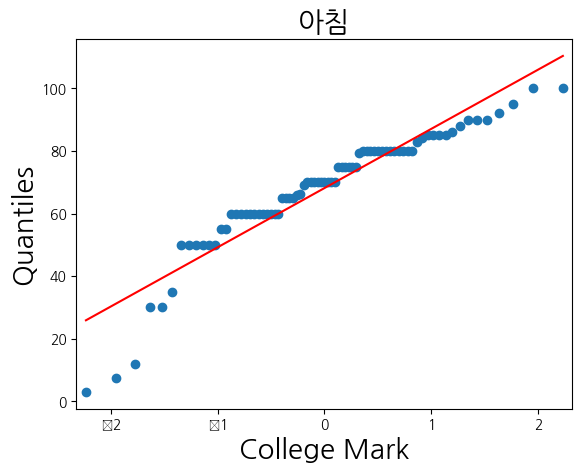

In [97]:
# Morning
plt.figure(figsize=(6, 6))
sm.qqplot(df[df['prefer to study in'] == 'Morning']['college mark'], line='s')
plt.title('아침', fontsize=20)
plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
plt.show()

<Figure size 600x600 with 0 Axes>

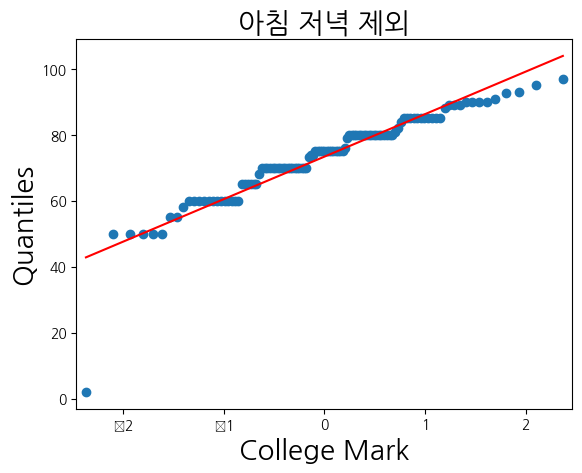

In [95]:
# Anytime
plt.figure(figsize=(6, 6))
sm.qqplot(df[df['prefer to study in'] == 'Anytime']['college mark'], line='s')
plt.title('아침 저녁 제외', fontsize=20)
plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
plt.show()

<Figure size 600x600 with 0 Axes>

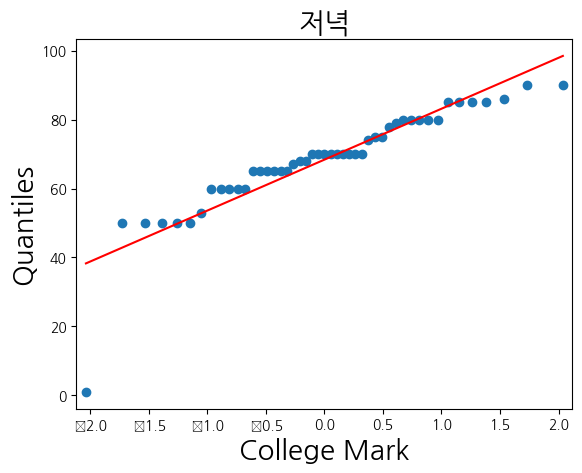

In [96]:
# Night
plt.figure(figsize=(6, 6))
sm.qqplot(df[df['prefer to study in'] == 'Night']['college mark'], line='s')
plt.title('저녁', fontsize=20)
plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
plt.show()

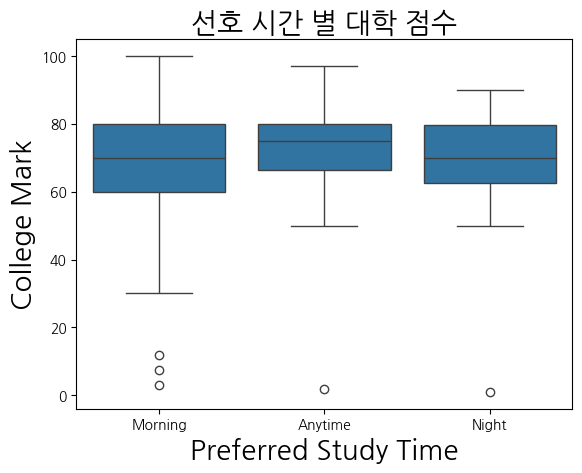

In [99]:
import seaborn as sns

sns.boxplot(data = df, x = 'prefer to study in', y = 'college mark')
# 폰트 크기 설정
plt.xlabel('Preferred Study Time', fontsize=20)  # x축 제목
plt.ylabel('College Mark', fontsize=20)          # y축 제목
plt.title('선호 시간 별 대학 점수', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

In [13]:
## Q.이상치를 제거할지 말지에 대한 의견 작성
df_college_mark_counts = (df['college mark'] < 20).sum()
df_college_mark_counts

5

In [14]:
lower_df = df[df['college mark'] < 20]
lower_df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
6,Yes,Male,BCA,165.0,50.0,70.0,63.0,3.0,Reading books,1 - 2 Hour,Morning,15000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,Good,good,No
49,No,Male,B.com Accounting and Finance,155.0,55.0,73.0,72.0,1.0,Reading books,1 - 2 Hour,Night,15000,Yes,75%,1 - 30 Minute,30 - 60 minutes,Good,good,No
93,No,Male,BCA,175.0,65.0,76.0,70.0,7.5,Sports,1 - 2 Hour,Morning,15000,No,50%,1 - 1.30 hour,30 - 60 minutes,Good,good,No
148,No,Female,B.com Accounting and Finance,130.0,35.0,80.2,70.0,12.0,Reading books,More Than 4 hour,Morning,30000,No,50%,30 - 60 Minute,1 - 1.30 hour,Good,Bad,No
183,Yes,Male,B.com ISM,173.0,92.0,54.0,65.0,2.0,Cinema,0 - 30 minute,Anytime,23000,Yes,100%,More than 2 hour,1 - 1.30 hour,Good,good,No


In [15]:
##의견ps. 이상치 제거 여부 => not equal 0이고, 샘플 수가 적기 때문에 
##        이상치 제거 안하고 분석 진행!

In [16]:
# normal
from scipy.stats import shapiro

print(shapiro(df[df['prefer to study in'] == 'Morning']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Anytime']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Night']['college mark']))

ShapiroResult(statistic=0.8990122079849243, pvalue=1.5592280760756694e-05)
ShapiroResult(statistic=0.8948537707328796, pvalue=2.629093387440662e-07)
ShapiroResult(statistic=0.8447308540344238, pvalue=1.88336125575006e-05)


In [17]:
## A. shapiro test 결과, 세 가지 그룹에 대해 모두 귀무가설 기각, normal을 따르지 않는다고 판단.

In [18]:
## equal variance test
from scipy.stats import levene
levene(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

LeveneResult(statistic=3.705792012954079, pvalue=0.026047597758914846)

In [20]:
## A. levene test 결과, p-value < 0.05로 귀무가설 기각, 즉 분산이 같지 않다고 판단.

In [21]:
## ANOVA test
from scipy.stats import kruskal
kruskal(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

KruskalResult(statistic=5.816953896031301, pvalue=0.05455876245308601)

In [22]:
## normal을 따르지 않고 분산이 같지 않다고 판단하여, kruskal test를 수행한 결과,
## p-value > 0.05로 귀무가설 채택
## 공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 유의미한 차이가 없다고 결론을 냄.

In [23]:
## EDA2

In [24]:
## Q: 학생의 12학년 성적(12th Mark)와 대학 성정(college mark)의 관계(correlation)가 있을까?

In [26]:
# 먼저, 12th mark와 college mark의 분포 확인

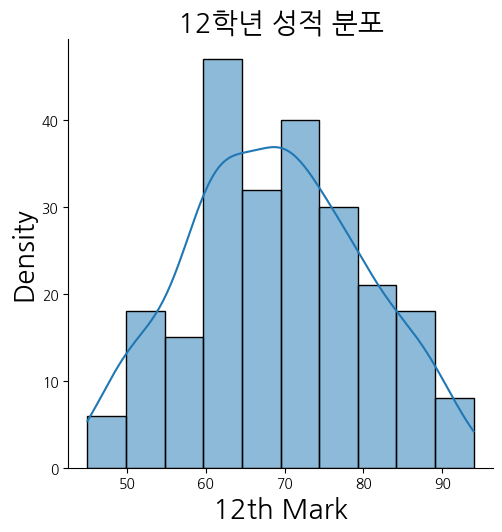

ShapiroResult(statistic=0.9843690991401672, pvalue=0.010986778885126114)


In [100]:
sns.displot(df['12th Mark'], kde=True)

# 폰트 크기 설정
plt.xlabel('12th Mark', fontsize=20)  # x축 제목
plt.ylabel('Density', fontsize=20)     # y축 제목
plt.title('12학년 성적 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()
print(shapiro(df['12th Mark']))

ShapiroResult(statistic=0.8794555068016052, pvalue=1.0397339456416632e-12)


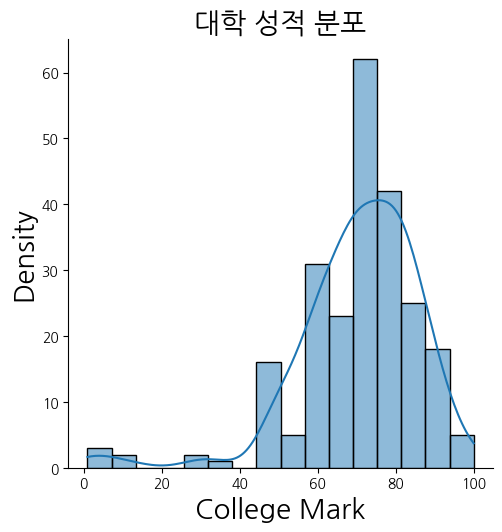

In [103]:
sns.displot(df['college mark'], kde=True)
print(shapiro(df['college mark']))

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)  # x축 제목
plt.ylabel('Density', fontsize=20)       # y축 제목
plt.title('대학 성적 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

In [38]:
## correlation test

SignificanceResult(statistic=0.5105157446127417, pvalue=5.337604931231386e-17)


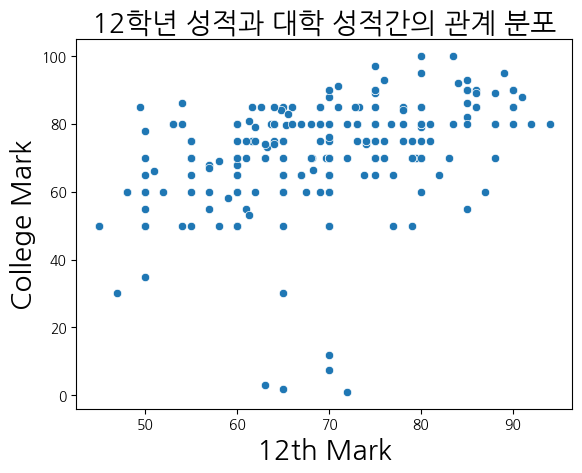

In [107]:
from scipy.stats import spearmanr

sns.scatterplot(x='12th Mark', y='college mark', data=df)
print(spearmanr(df['12th Mark'],df['college mark']))

# 폰트 크기 설정
plt.xlabel('12th Mark', fontsize=20)    # x축 제목
plt.ylabel('College Mark', fontsize=20)  # y축 제목
plt.title('12학년 성적과 대학 성적간의 관계 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

In [43]:
## A. normal하지 않으므로, spearman correlation test 수행한 결과,
## p-value < 0.05로 귀무가설 기각
## 학생의 12학년 성적(12th Mark)와 대학 성정(college mark)의 관계(correlation)가 있다고 판단! 

In [47]:
## regression

In [48]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [ ]:
## height, weight은 관련 없다고 판단.
## pair plot

<Figure size 1000x800 with 0 Axes>

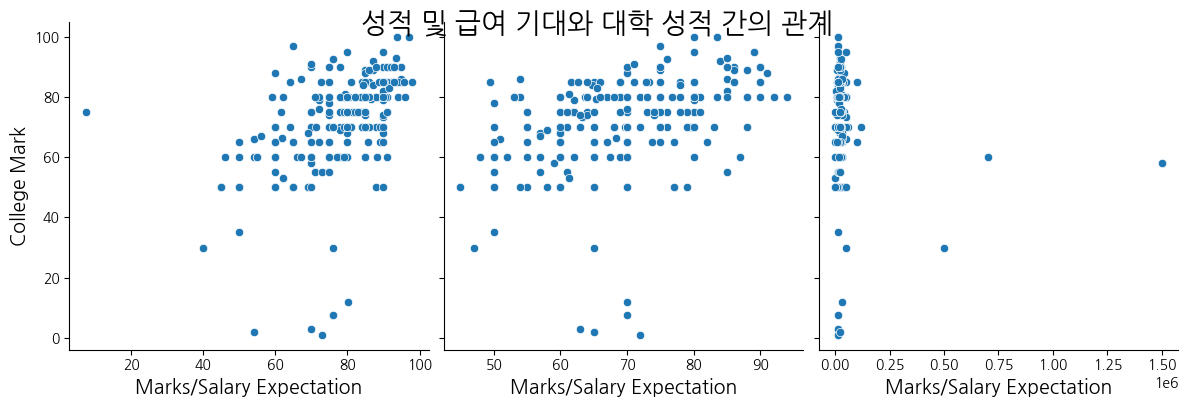

In [126]:
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(df, x_vars=['10th Mark', '12th Mark', 'salary expectation'], 
                         y_vars=['college mark'], height=4, aspect=1, kind='scatter')
plt.suptitle('성적 및 급여 기대와 대학 성적 간의 관계', fontsize=20)  # 전체 제목 설정
# 각 축 제목 설정 (x, y 축 제목은 pairplot이 자동으로 설정하므로 개별적으로 변경 필요)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel('Marks/Salary Expectation', fontsize=14)  # x축 제목
    ax.set_ylabel('College Mark', fontsize=14)  # y축 제목

# 제목이 겹치지 않도록 조정
plt.subplots_adjust(top=0.95)

# 그래프 보여주기
plt.show()

In [113]:
#따로 나눠서 plot

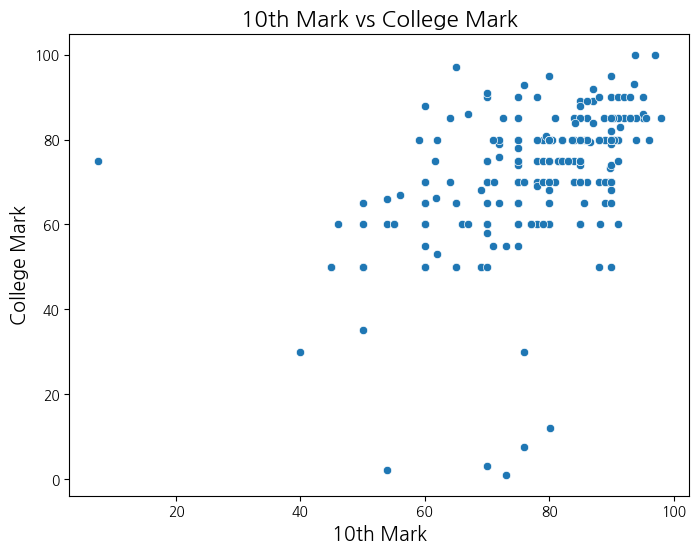

In [115]:
# 10th Mark와 College Mark 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='10th Mark', y='college mark', data=df)
plt.title('10th Mark vs College Mark', fontsize=20)
plt.xlabel('10th Mark', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()

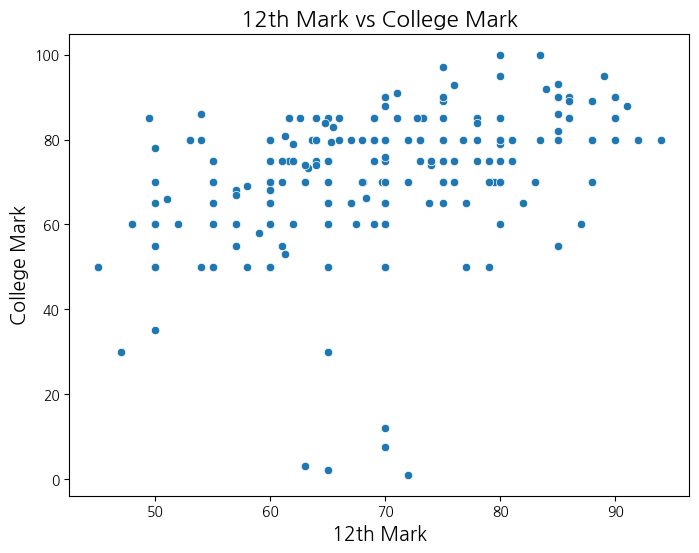

In [116]:
# 12th Mark와 College Mark 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='12th Mark', y='college mark', data=df)
plt.title('12th Mark vs College Mark', fontsize=20)
plt.xlabel('12th Mark', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()

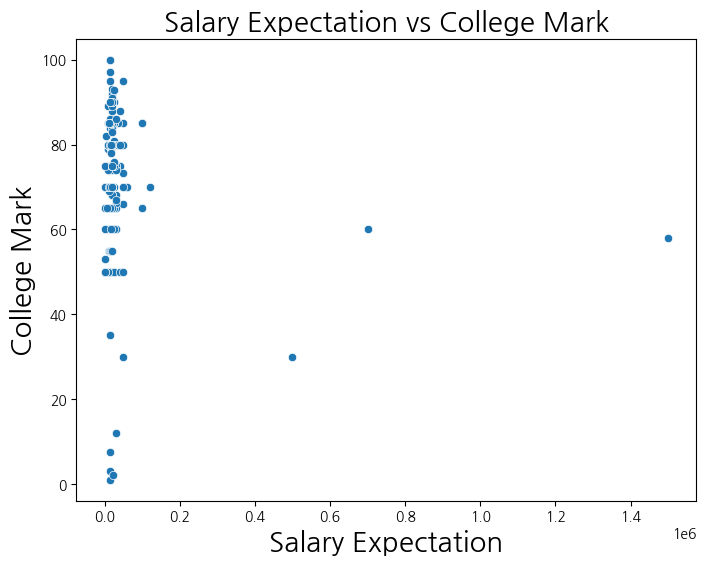

In [119]:
# Salary Expectation과 College Mark 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary expectation', y='college mark', data=df)
plt.title('Salary Expectation vs College Mark', fontsize=20)
plt.xlabel('Salary Expectation', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()

In [53]:
## 10th mark, 12th mark, salary expection과 college mark 간의 관계중
## 10th mark가 college mark에 영향 크다고 판단.

In [54]:
## linear regresssion

In [55]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = df[['10th Mark']]  # 독립 변수
y = df['college mark']  # 종속 변수

# 상수항 추가
X_const = sm.add_constant(X)
# print(X_const.head())

lr = sm.OLS(y, X_const).fit()
print(lr.params)

const        27.506628
10th Mark     0.561545
dtype: float64


In [57]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           college mark   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     64.58
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.62e-14
Time:                        02:10:27   Log-Likelihood:                -951.72
No. Observations:                 235   AIC:                             1907.
Df Residuals:                     233   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5066      5.446      5.050      0.0

In [59]:
## A. R-squared값 0.217
## college mark의 변동 중 21.7% 변동을 10th Mark가 설명
## 설명력이 낮다는 결론을 냄. 다른 변수들 추가 필요할 수 있음.
## 10th mark는 college mark에 유의미한 영향을 미칠 수 있음.
## inference를 위한 조건에 부합하지 않는 부분 존재
## 추후 연구 필요!

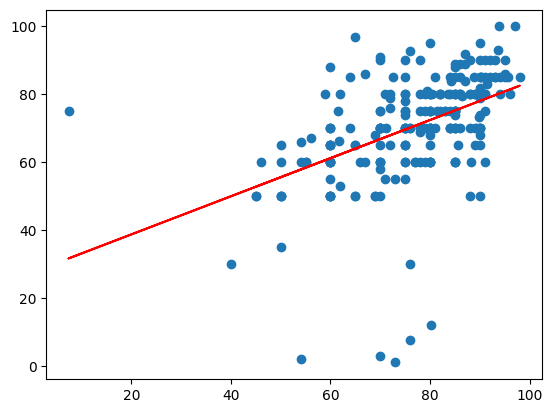

In [60]:
plt.scatter(X,y)
plt.plot(X,0.5615*X + 27.5066, 'r')
plt.show()